In [1]:
import os
import glob
import itertools
from random import randint
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn
plt.style.use('seaborn-white')
from pathlib import Path


import matplotlib.cm as cm
from IPython.display import Image


## Git-python: checkout master branch

In [2]:
# import git
# repo = git.Repo('/work/westgroup/ChrisB/meoh-synthesis_RMG/meOH-synthesis/')
# repo.git.checkout('master')
# git_sha = str(repo.head.commit)[0:6]
# git_msg = str(repo.head.commit.message)[0:25].replace(" ", "_").replace("'", "_")
# print(sha,': ', msg)

## checkout 1 commit back

In [3]:
# repo.git.checkout('HEAD^1')
# sha = str(repo.head.commit)
# msg = str(repo.head.commit.message)
# print(sha,': ', msg)

## checkout 2 commits back

In [4]:
# repo = git.Repo('/work/westgroup/ChrisB/meoh-synthesis_RMG/meOH-synthesis/')
# repo.git.checkout('HEAD^1')
# sha = repo.head.commit
# msg = repo.head.commit.message
# print(sha,': ', msg)

## Read in data

In [5]:
# csv = 'csv'
# log = 'log'
# all_filenames = [i for i in glob.glob('*.{}'.format(csv))]
# all_logs = [i for i in glob.glob('*.{}'.format(log))]
# print(all_filenames,all_logs)

commit_list = []

# read in each filename into dictionary. 
for path in Path('../').rglob('*.csv'):
    path_str = str(path)
    start_index = path_str.find('../RMG_wDeut/')
    
    if start_index != -1:
        commit = path_str[(start_index+13):(start_index+40)]
        if commit not in commit_list:
            commit_list.append(commit)
        
print(commit_list)   
# os.remove("endrxncsv.csv")

['1054d4_including_David_s_vd', '4f37c9_rerun_with_fixed_sur', '7487a0_reran_without_any_gr', 'b12515_model_run_with_RMG-P']


In [6]:
# read last line from each CSV file
data_dict = {}

for commit in commit_list:
    first_file = True
    for path in Path('../RMG_wDeut/' + commit).rglob('*.csv'):

        path_str = str(path)

        if first_file == True: 
            data = pd.read_csv(path_str)
            aggdata = data.tail(1)
            first_file = False
            print('ran')
        else: 
            data = pd.read_csv(path_str)
            aggdata = aggdata.append(data.tail(1))
            print(len(aggdata))
            
    data_dict.update({commit:aggdata})



ran
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
ran
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
ran
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
ran
2
3
4
5
6
7
8
9
10
11
12
13
14

## Turn over frequency comparison

The mechanisms listed below are the pathways that are of interest in TOF.



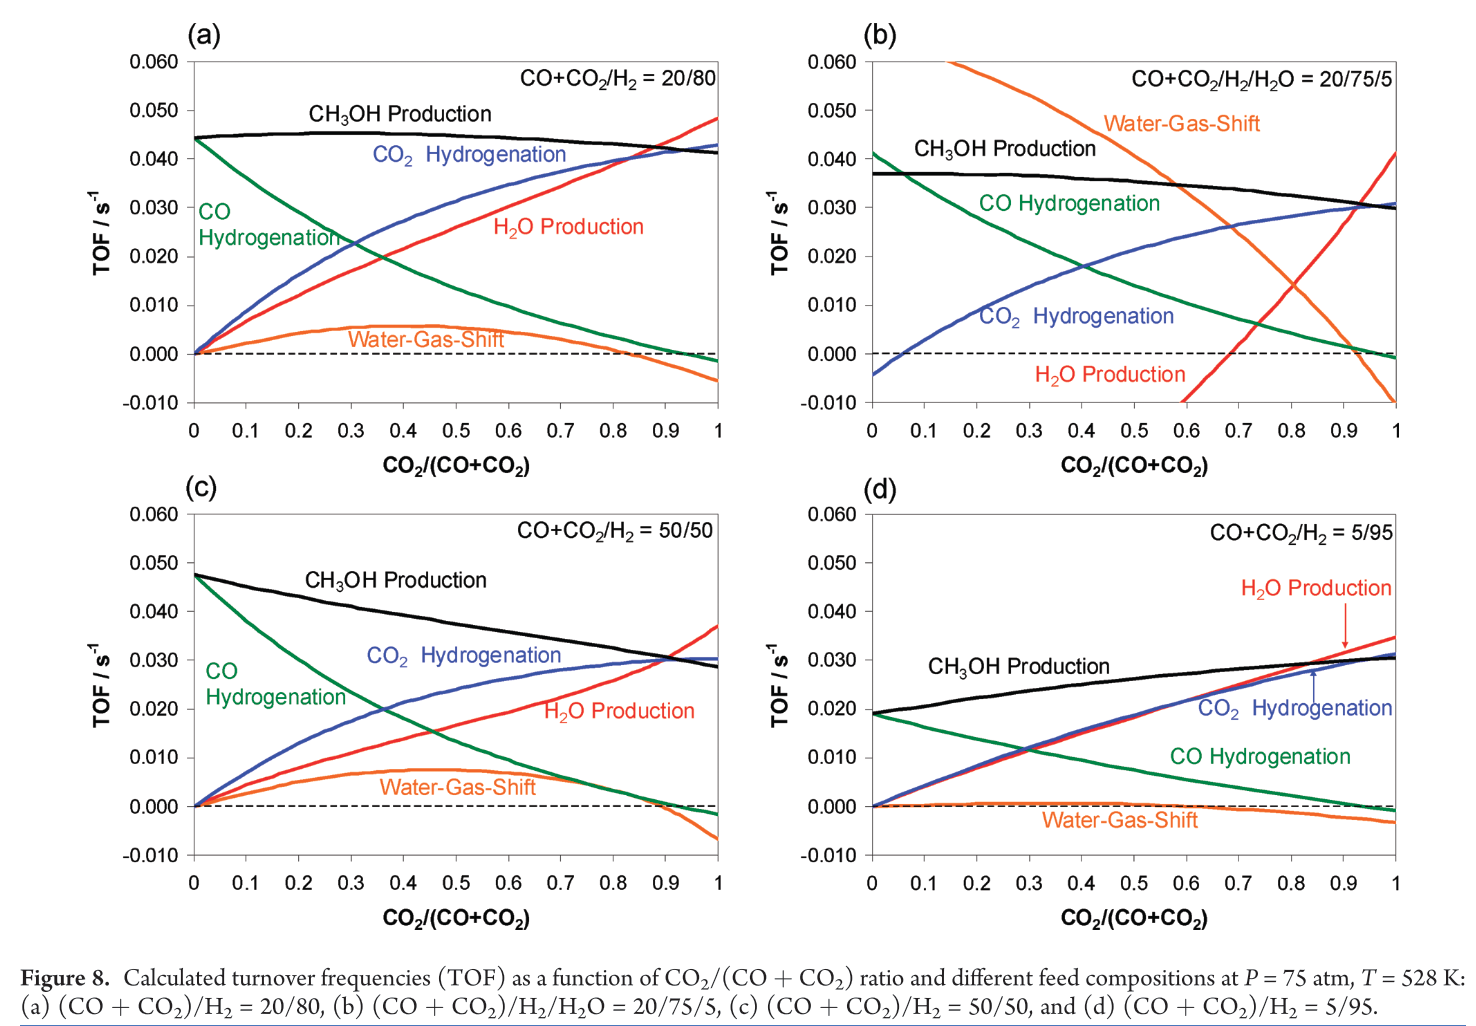

In [7]:
Image('../images/Grabow_plots/Grabow_TOF.png',width = 700, height = 300)

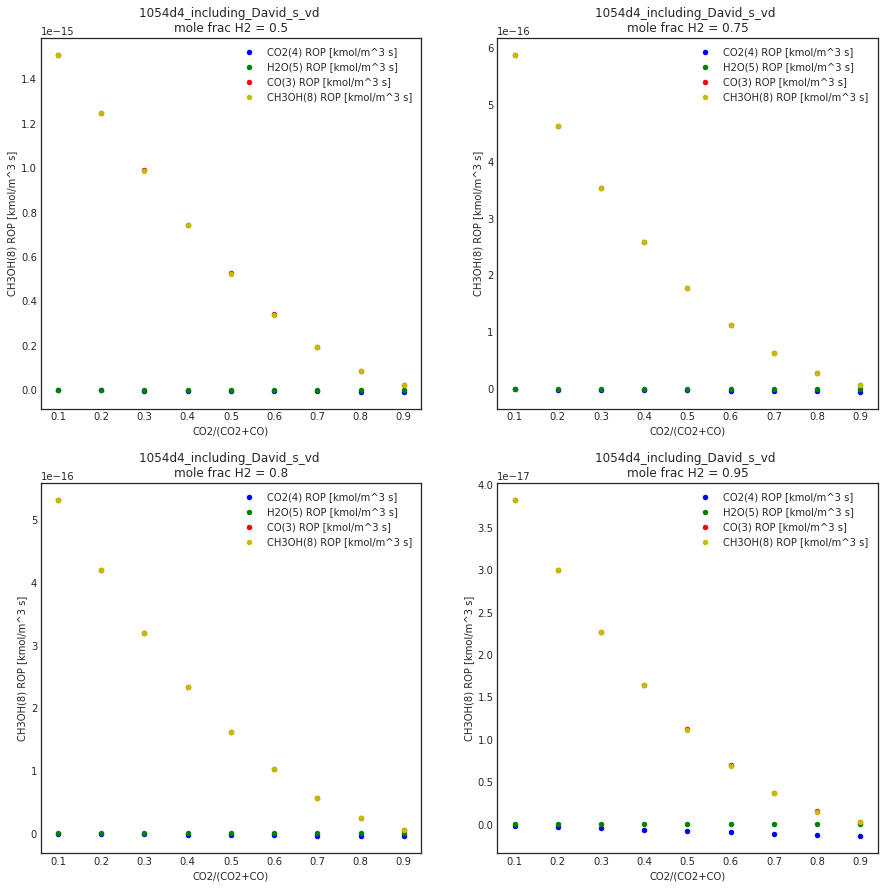

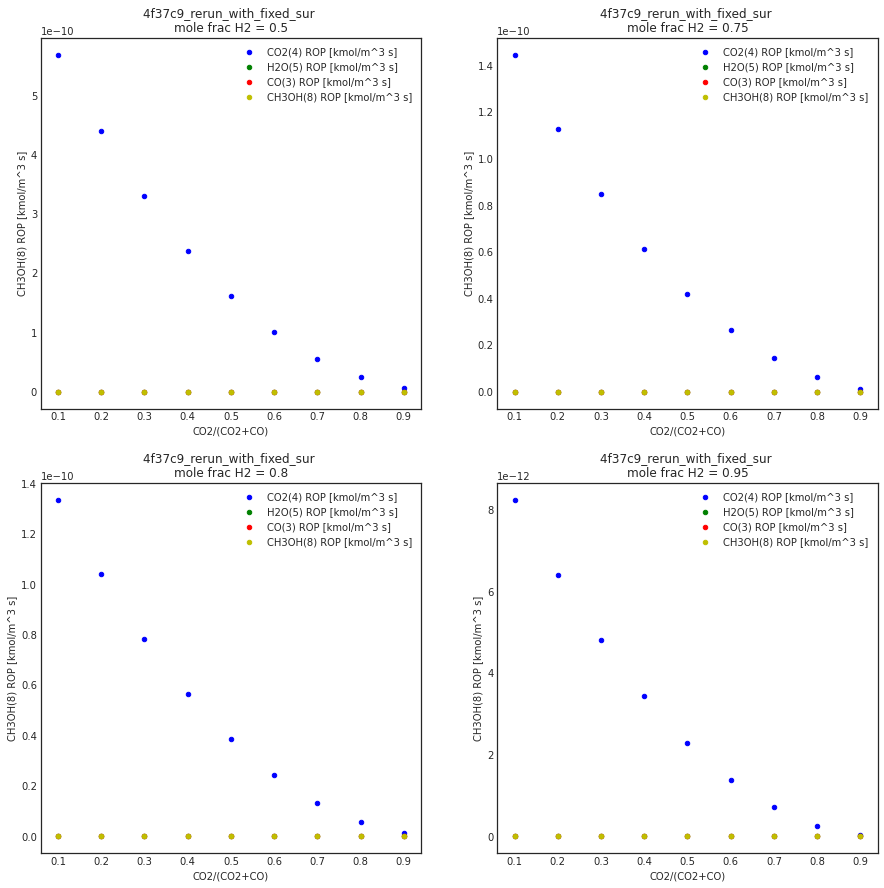

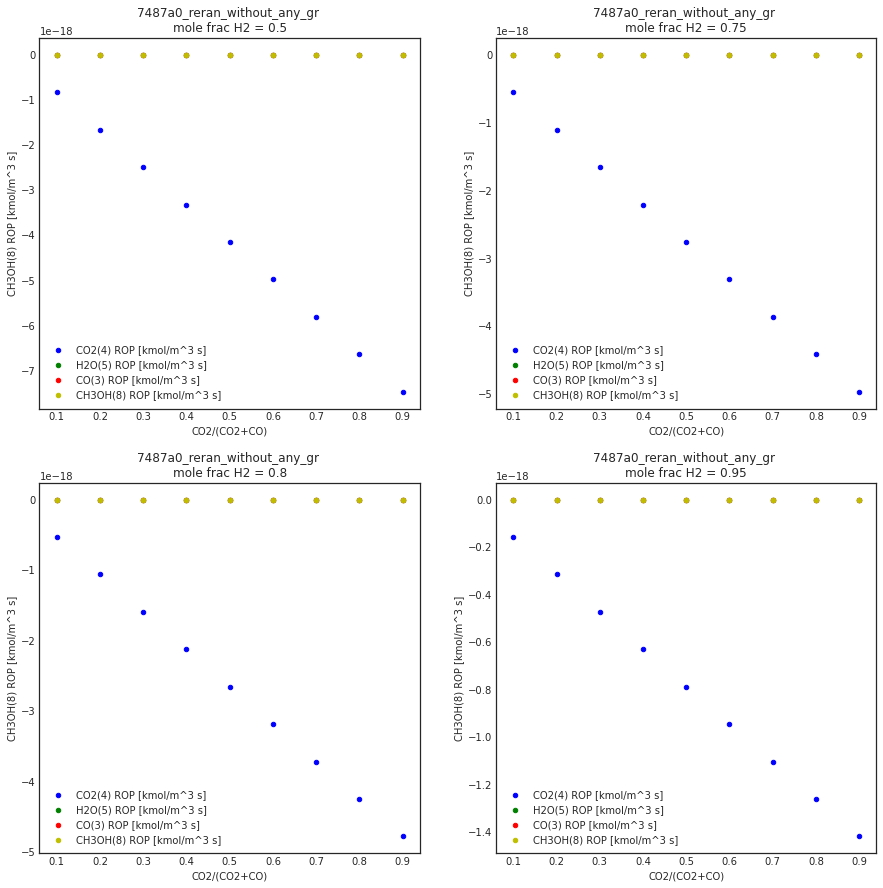

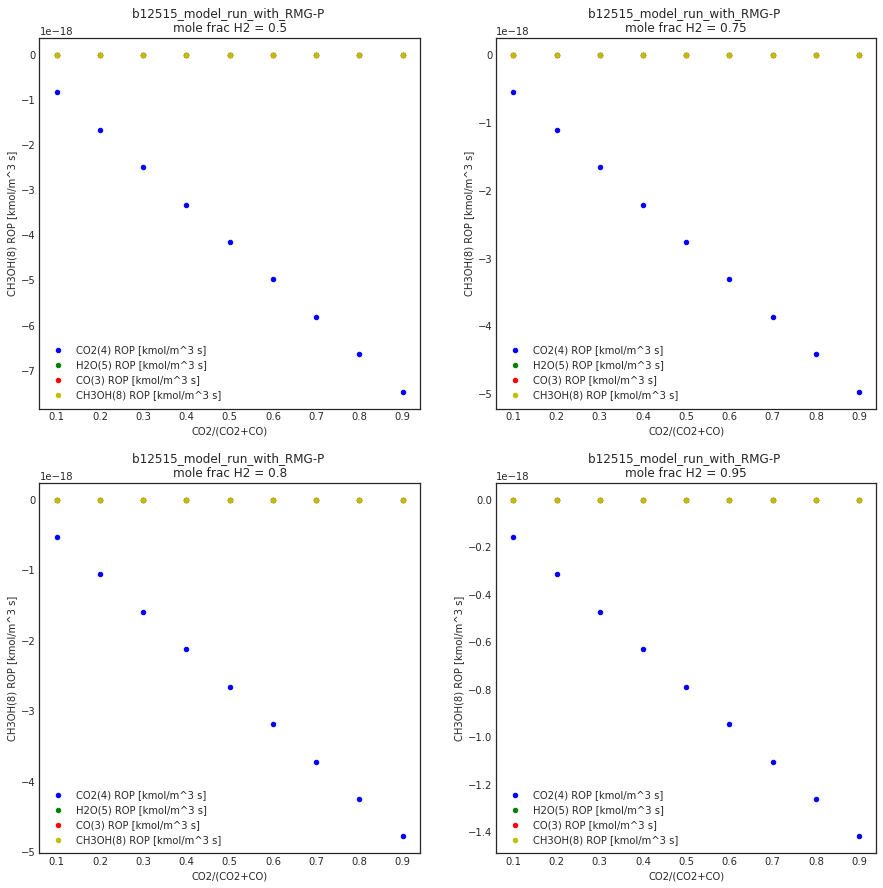

In [8]:
# compare the rate of production for CO2,  H2O, CO, and CH3OH

for commit in commit_list:
# commit = '1054d4_including_David_s_vd'  

    conditions = ['CO2(4) ROP [kmol/m^3 s]', 'H2O(5) ROP [kmol/m^3 s]', \
                 'CO(3) ROP [kmol/m^3 s]', 'CH3OH(8) ROP [kmol/m^3 s]']

    temp = 600

    # get keys for H2 (X_h2 initial)
    H2_ratio = data_dict[commit_list[1]]['X_h2 initial'].unique()

    fig, ax = plt.subplots(2,2,figsize=(15,15))

    color_dict = { 0:"b", 1:"g", 2:"r", 3:"y"}
    for p,j in enumerate(H2_ratio):
        if p == 0:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,0], color=color_dict[c])
                ax[0,0].set_title(f'{commit} \nmole frac H2 = {j}')
        if p == 1:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,1], color=color_dict[c])
                ax[0,1].set_title(f'{commit} \nmole frac H2 = {j}')

        if p == 2:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,0], color=color_dict[c])
                ax[1,0].set_title(f'{commit} \nmole frac H2 = {j}')

        if p == 3:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,1], color=color_dict[c])
                ax[1,1].set_title(f'{commit} \nmole frac H2 = {j}')
            



## Surface coverage comparison


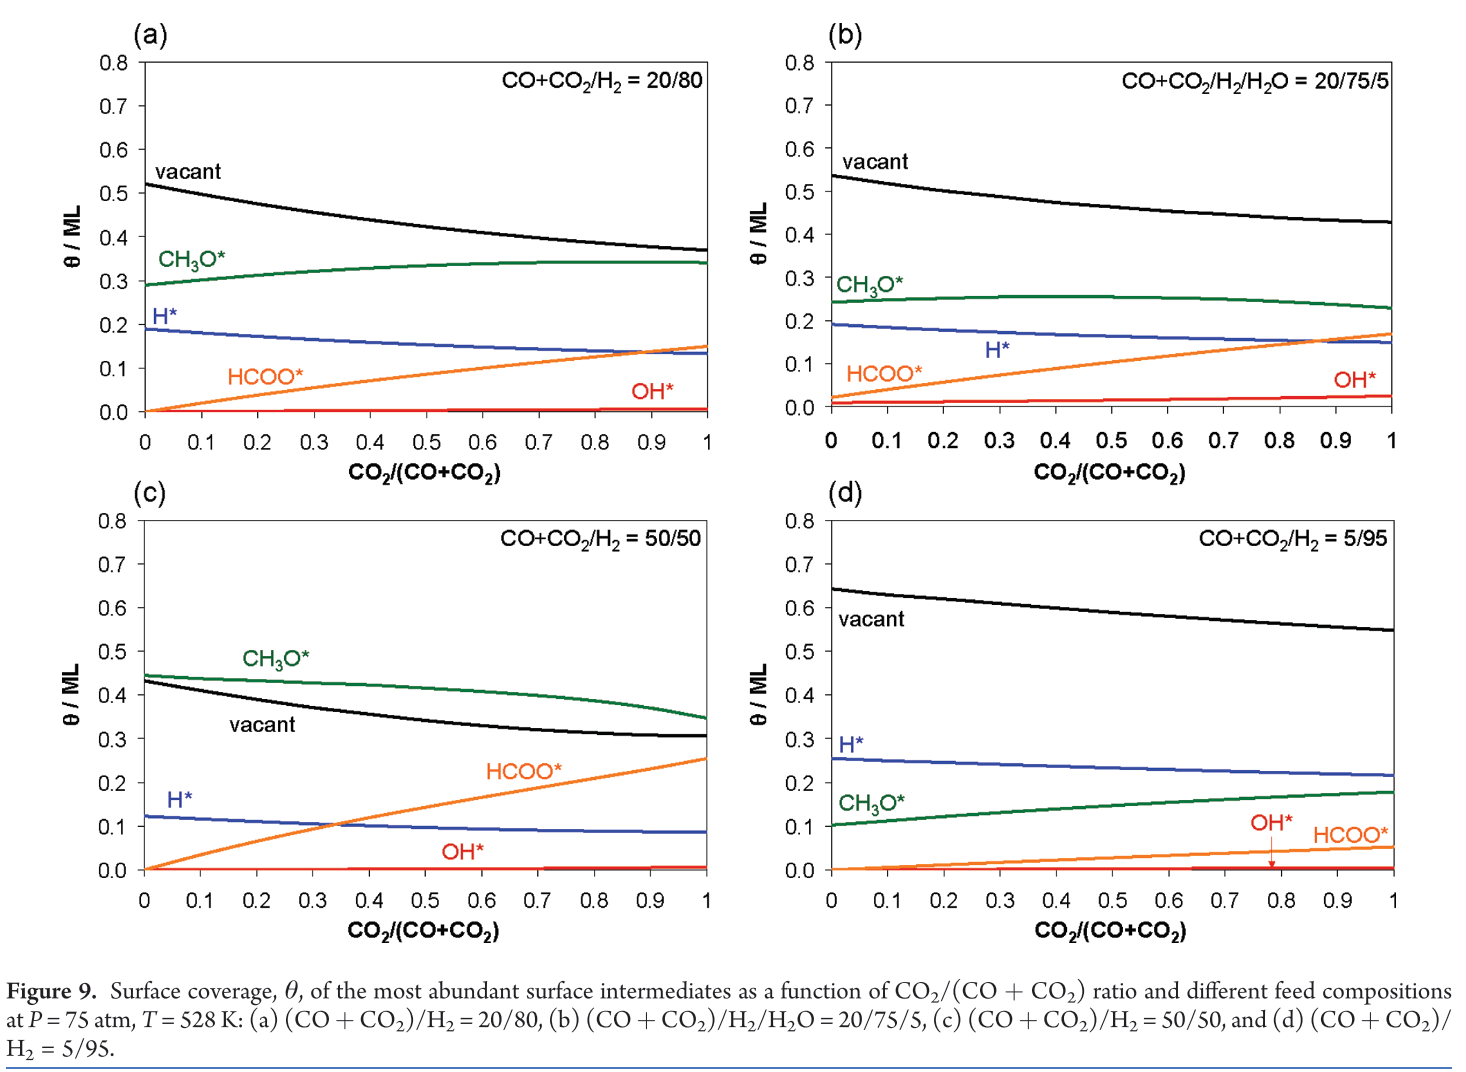

In [10]:
Image('../images/Grabow_plots/Grabow_coverage.png',width = 700, height = 300)

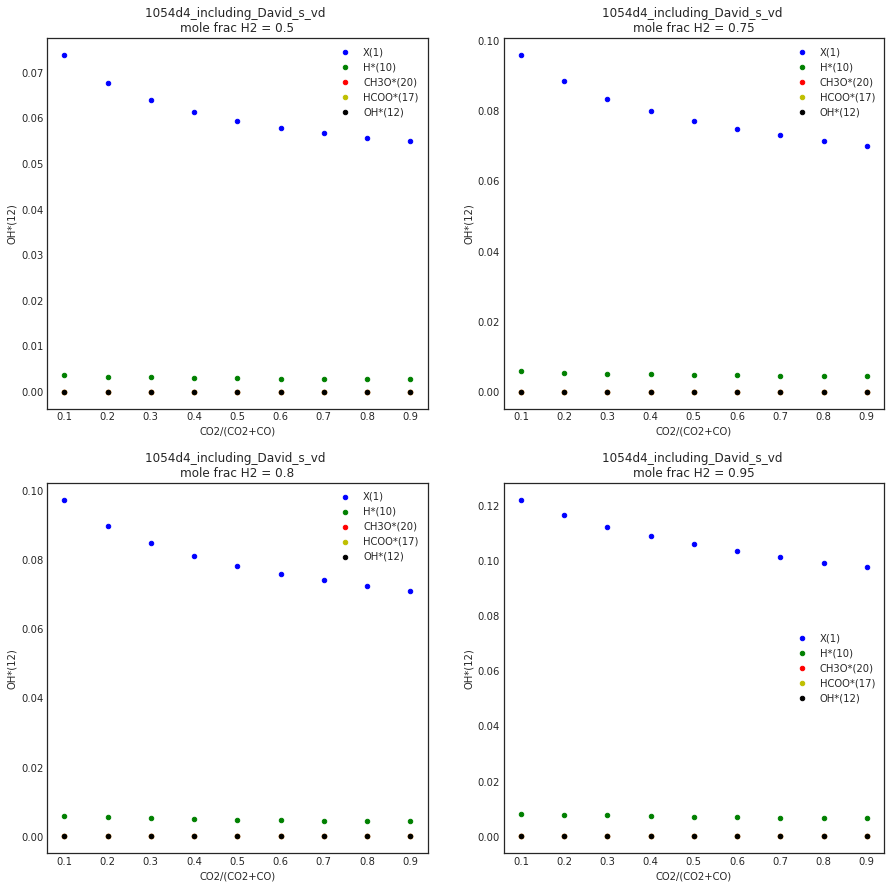

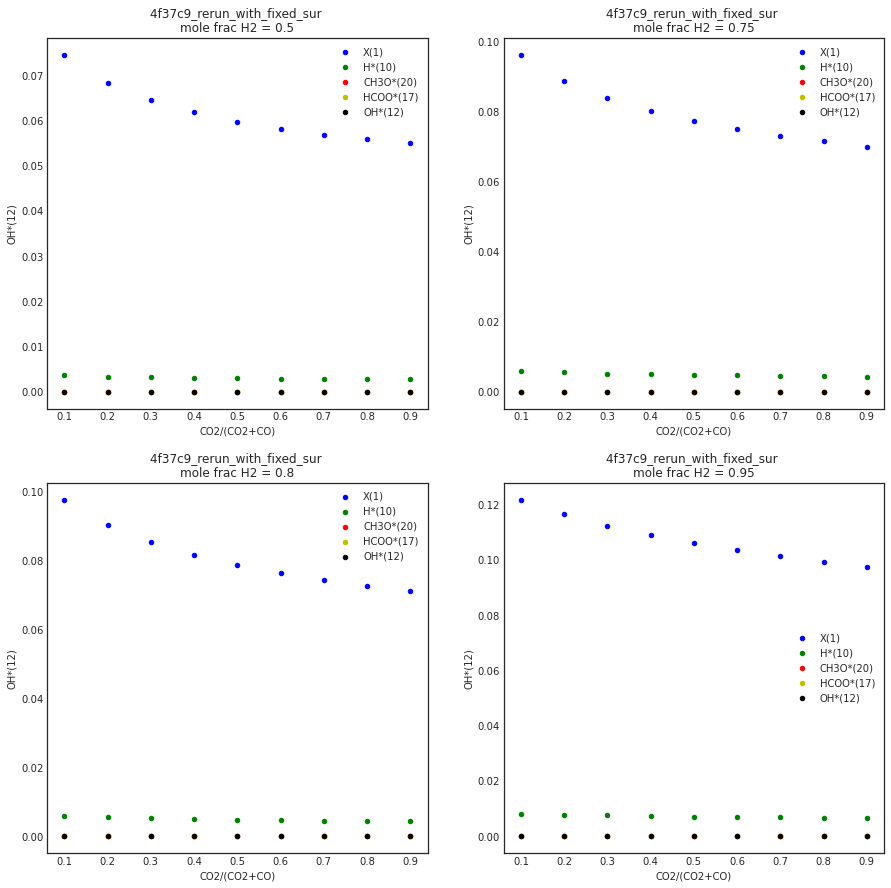

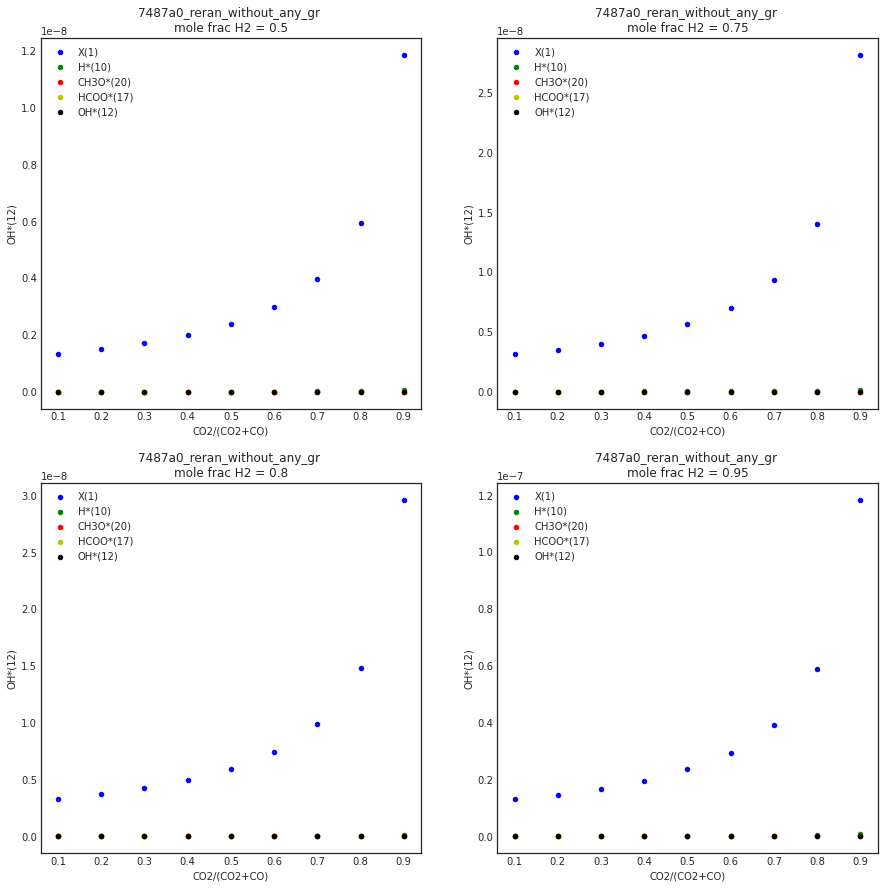

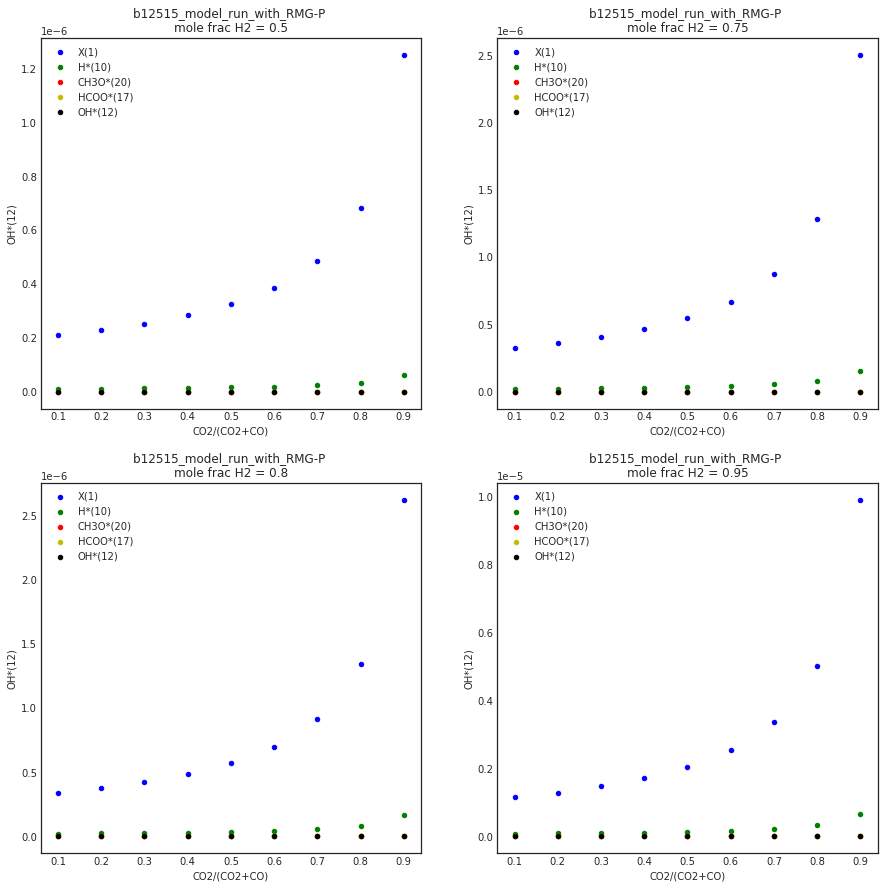

In [11]:
for commit in commit_list:  

    conditions = ['X(1)', 'H*(10)', 'CH3O*(20)', 'HCOO*(17)', 'OH*(12)']

    temp = 500

    # get keys for H2 (X_h2 initial)
    H2_ratio = data_dict[commit_list[1]]['X_h2 initial'].unique()

    fig, ax = plt.subplots(2,2,figsize=(15,15))

    color_dict = { 0:"b", 1:"g", 2:"r", 3:"y", 4: "k"}
    for p,j in enumerate(H2_ratio):
        if p == 0:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,0], color=color_dict[c])
                ax[0,0].set_title(f'{commit} \nmole frac H2 = {j}')
        if p == 1:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,1], color=color_dict[c])
                ax[0,1].set_title(f'{commit} \nmole frac H2 = {j}')

        if p == 2:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,0], color=color_dict[c])
                ax[1,0].set_title(f'{commit} \nmole frac H2 = {j}')

        if p == 3:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,1], color=color_dict[c])
                ax[1,1].set_title(f'{commit} \nmole frac H2 = {j}')

## flux diagrams

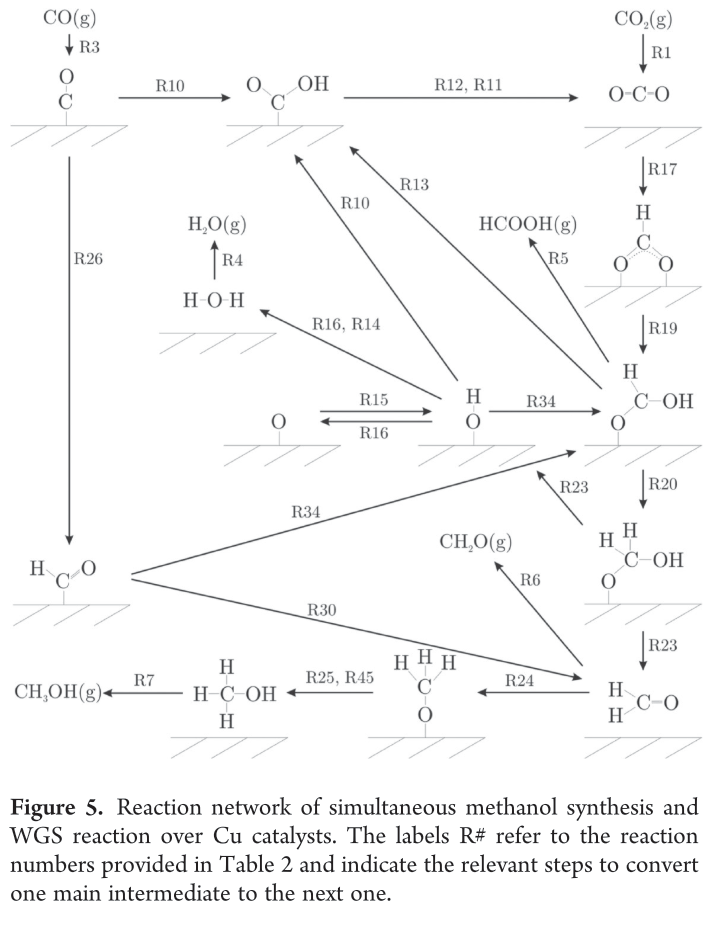

In [12]:
Image('../images/Grabow_plots/Grabow_rxn_path.png',width = 500, height = 300)

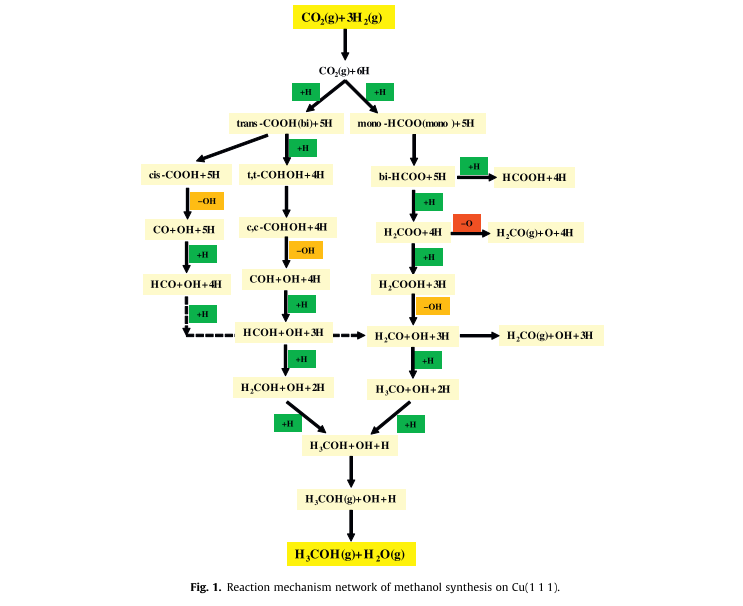

In [13]:
Image('../images/Reaction_mechanism_alternative.png',width = 700, height = 300)

description of commits: 


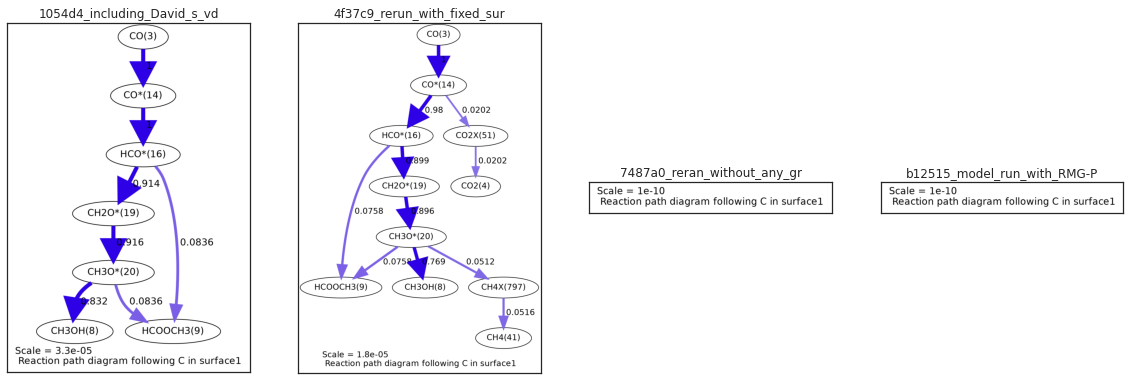

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline


# figure size in inches optional
rcParams['figure.figsize'] = 20 ,20
img = []
flux_path = []
fig, ax = plt.subplots(1,len(commit_list))
for i,commit in enumerate(commit_list):
    temp = 500 
    H2_frac = "0_5"
    CO_CO2 = "0_5"
    element = "C"
    phase = "surface1" # "surface1" "gas"
    time = "end" # "end" "beginning"
    prefix = '../RMG_wDeut/'
    flux_path.append(f'/IdealGasConstPressureReactor/{temp}/flux_diagrams/{H2_frac}/{CO_CO2}/reaction_path_{element}_{phase}_{time}.png')

    img.append(mpimg.imread(f'{prefix}{commit}{flux_path[i]}'))
    ax[i].imshow(img[i])
    ax[i].get_xaxis().set_visible(False) 
    ax[i].get_yaxis().set_visible(False) 
    ax[i].set_title(f'{commit}')


